# Упражнение 1

Вычислите матрицу Грамма $(A_{ij} = <e_i, e_j>)$ для матрицы Гильберта $(G = {1, x, x^2, ..., x^{n - 1}})$

1. С помощью методы прямых итераций найдите максимальтое собственное число матрицы.


2. С помощью метода итераций со сдвигом найдите минимальное собственное число матрицы.


3. Постройте график спектрального числа обусловленности $\kappa (A)$ как функцию $n$. Найдите численно примерную зависимость.

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
Matrix = List[List[float]]
Vector = List[float]

In [10]:
def generate_gilbert_matrix(n: int) -> Matrix:
    H = [[0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            H[i][j] = 1. / (i + j + 1)
    
    return H

1. Максимальное собственное значение

In [13]:
def power_iteration(A: Matrix, num_iterations: int) -> float:
    A = np.array(A)
    x = np.random.rand(A.shape[1])
    l = 0
    
    for _ in range(num_iterations):
        y = np.dot(A, x)
        l = np.inner(y, x)
        
        x = y / np.linalg.norm(y)

    return l

In [25]:
# test for matrix [[1, 2], [3, 4]]
print("expected = {} actual = {}".format((1. / 2) * (5 + math.sqrt(33)), power_iteration([[1, 2], [3, 4]], 10)))

expected = 5.372281323269014 actual = 5.372281323287302


In [17]:
power_iteration(generate_gilbert_matrix(3), 10)

1.4083189271236538

2. Минимальное собственное значение

In [18]:
def power_iteration_shift_for_min(A: Matrix, num_iterations: int) -> float:
    l_max = power_iteration(A, num_iterations)
    A_shift = np.array(A) - l_max * np.identity(len(A))
    
    return power_iteration(A_shift, num_iterations) + l_max

In [27]:
print("expected = {} actual = {}".format((1. / 2) * (5 - math.sqrt(33)), 
                                         power_iteration_shift_for_min([[1, 2], [3, 4]], 10)))

expected = -0.3722813232690143 actual = -0.3722813232690152


In [19]:
power_iteration_shift_for_min(generate_gilbert_matrix(3), 10)

0.015278352653013139

3. Зависимость между числом обусловленности и $n$

In [55]:
def cond_number_dependence_on_dim(n_min: int, n_max: int, step: int) -> (Vector, Vector, Vector, Vector):
    n_all = np.arange(n_min, n_max + 1, step)
    cond_numbers = []
    sigmas_min = []
    sigmas_max = []
    
    for n in n_all:
        A = np.array(generate_gilbert_matrix(n))
        u, s, vh = np.linalg.svd(A)
        sigma_min = s.min()
        sigma_max = s.max()
        sigmas_min.append(sigma_min)
        sigmas_max.append(sigma_max)
        cond_numbers.append(float(sigma_max / sigma_min))
    
    return n_all, cond_numbers, sigmas_min, sigmas_max

In [59]:
n, cond_numbers, mins, maxs = cond_number_dependence_on_dim(4, 50, 1)

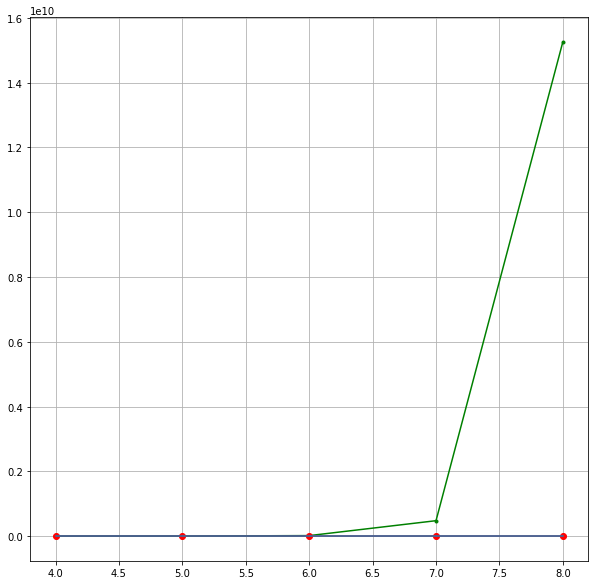

In [63]:
plt.figure(figsize=(10, 10))

plt.plot(n[:5], cond_numbers[:5], 'g.-')
plt.plot(n[:5], mins[:5], 'ro-')
plt.plot(n[:5], maxs[:5])
plt.grid()

plt.show()

**Вывод по третьему пункту:** число обусловленности для матрицы Гильберта с увеличением размера $n$ матрицы растет экпоненциально